PYTHON PROJECT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import where as IF

1.Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [3]:
claims = pd.read_csv("/content/drive/MyDrive/Python Project/claims.csv")
demo = pd.read_csv("/content/drive/MyDrive/Python Project/cust_demographics.csv")
demo.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [11]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [6]:
comb_df = pd.merge(right = claims,
                   left = demo, 
                   right_on = "customer_id", 
                   left_on = "CUST_ID",
                   how = "outer"
                  )
comb_df.drop(columns = ["customer_id"], inplace = True)
comb_df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [10]:
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,claim_month,Claim_month
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,2017-11-27,11.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,2018-10-03,10.0
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,2018-02-02,2.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,2018-04-04,4.0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,2018-06-17,6.0


2.Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.


In [9]:
comb_df["DateOfBirth"] = pd.to_datetime(comb_df.DateOfBirth, format = "%d-%b-%y")
comb_df.loc[(comb_df.DateOfBirth.dt.year > 2020),"DateOfBirth"]=comb_df[comb_df.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
comb_df["claim_date"] = pd.to_datetime(comb_df.claim_date, format = "%m/%d/%Y")
comb_df["Contact"] = pd.to_numeric(comb_df.Contact.str.replace("-",""),downcast='float')

3. Convert the column claim_amount to numeric. Use the appropriate
modules/attributes to remove the $ sign.


In [12]:
comb_df["claim_amount"] = pd.to_numeric(comb_df.claim_amount.str.replace("$",""),downcast='float')
comb_df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,claim_month,Claim_month
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,2017-11-27,11.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,2018-10-03,10.0


4. Of all the injury claims, some of them have gone unreported with the
police. Create an alert flag (1,0) for all such claims.


In [13]:
comb_df["flag"] = IF(comb_df.police_report == "No", 0 ,
                    IF(comb_df.police_report == "Yes", 1, np.nan))
comb_df.drop(columns = ["police_report"], inplace = True)

5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID
should remain unique.


In [14]:
comb_df = comb_df.groupby('CUST_ID').first().reset_index(drop = True)

6. Check for missing values and impute the missing values with an
appropriate value. (mean for continuous and mode for categorical)



In [15]:
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,claim_month,Claim_month,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,2018-04-10,4.0,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,2018-04-04,4.0,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,2017-10-17,10.0,NaN
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,2018-03-21,3.0,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,2018-07-27,7.0,0.0


In [16]:
comb_df["incident_cause"].isna().sum()

7

In [18]:
cat_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
con_col = ["claim_amount"]

In [19]:
for col in cat_col:
    comb_df[col] = comb_df[col].fillna(comb_df[col].mode()[0])
comb_df[con_col] = comb_df[con_col].fillna(comb_df[con_col].mean())
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,claim_month,Claim_month,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,2018-04-10,4.0,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,2018-04-04,4.0,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,2017-10-17,10.0,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,2018-03-21,3.0,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,2018-07-27,7.0,0.0


In [20]:
# comb_df["incident_cause"].fillna(0, inplace =True)
comb_df["State"].isna().sum()

0

7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60



In [21]:
comb_df["Age"] = round((comb_df.claim_date - comb_df.DateOfBirth).apply(lambda x: x.days)/365.25, 2)

In [22]:
comb_df["Age_grp"] = IF(comb_df.Age < 18, "Children",
                        IF(comb_df.Age < 30, "Youth",
                         IF(comb_df.Age < 60, "Adult",
                          IF(comb_df.Age < 100, "Senior", "NaN"
                           
                          )
                         )
                        )
                       )
comb_df["Age_grp"] = comb_df["Age_grp"].fillna(comb_df["Age_grp"].mode())
comb_df.groupby(by = "Age_grp").count()
# comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,claim_month,Claim_month,flag,Age
Age_grp,,,,,,,,,,,,,,,,,
Adult,744,744,744,744,744,744,744,744,744,744,744,736,744,744,744,744,744
Children,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
NaN,7,7,7,7,7,0,7,0,7,7,7,0,7,0,0,7,0
Youth,326,326,326,326,326,326,326,326,326,326,326,324,326,326,326,326,326


8. What is the average amount claimed by the customers from various
Segments?


In [23]:
comb_df.groupby(by = "Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12755.710938
Platinum,12370.138672
Silver,12271.163086


9. What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.



In [24]:
comb_df.loc[comb_df.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                  724462.5
total_Driver error          3264286.0
total_Natural causes        1312706.0
total_Other causes          3725038.5
total_Other driver error    3318806.5
Name: claim_amount, dtype: float32

10. How many adults from TX, DE and AK claimed insurance for driver
related issues and causes?



In [25]:
comb_df.loc[(comb_df.incident_cause.str.lower().str.contains("driver") 
             & ((comb_df.State == "TX") | (comb_df.State == "DE") | (comb_df.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

11. Draw a pie chart between the aggregated value of claim amount based
on gender and segment. Represent the claim amount as a percentage on
the pie chart.


In [26]:
f1 = comb_df.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
f1.head()

,gender,Segment,claim_amount
0,Female,Gold,2122234.0
1,Female,Platinum,2381974.0
2,Female,Silver,1935970.0
3,Male,Gold,2622890.5
4,Male,Platinum,2120756.5


In [27]:
res = f1.pivot(index = "Segment", columns = "gender", values = "claim_amount")
res

gender,Female,Male
Segment,,
Gold,2122234.0,2622890.5
Platinum,2381974.0,2120756.5
Silver,1935970.0,2346666.0


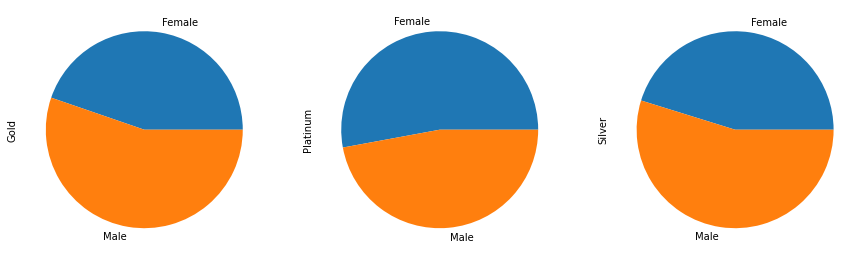

In [28]:
res.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()

12. Among males and females, which gender had claimed the most for any
type of driver related issues? E.g. This metric can be compared using a
bar chart


In [29]:
f2 = comb_df.loc[(comb_df.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
f2

,gender,CountOf_gender
0,Female,221
1,Male,280


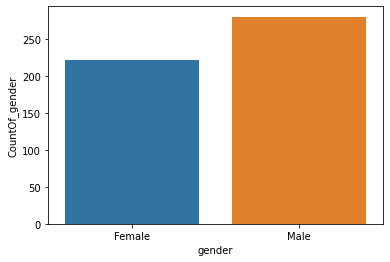

In [30]:
sns.barplot(x = "gender", y = "CountOf_gender", data = f2 )
plt.show()

13. Which age group had the maximum fraudulent policy claims? Visualize
it on a bar chart.


In [31]:
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,claim_month,Claim_month,flag,Age,Age_grp
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,2018-04-10,4.0,0.0,39.88,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,2018-04-04,4.0,0.0,45.29,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,2017-10-17,10.0,0.0,29.22,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,2018-03-21,3.0,1.0,46.59,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,2018-07-27,7.0,0.0,37.96,Adult


In [32]:
comb_df.groupby(by = "Age_grp")[["fraudulent"]].count()

,fraudulent
Age_grp,
Adult,744
Children,8
NaN,7
Youth,326


In [33]:
comb_df[(comb_df.Age_grp == np.nan)]

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,claim_month,Claim_month,flag,Age,Age_grp


In [34]:
val = comb_df['Age_grp'].mode()[0]
print(val)
comb_df.loc[:,"Age_grp"] = comb_df.loc[:,'Age_grp'].fillna(value = val)

Adult


In [35]:
comb_df[(comb_df.Age_grp == "nan")]

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,claim_month,Claim_month,flag,Age,Age_grp


In [36]:
comb_df['Age_grp'].mode()[0]

'Adult'

14.Visualize the monthly trend of the total amount that has been claimed
by the customers. Ensure that on the “month” axis, the month is in a
chronological order not alphabetical order.


In [37]:
comb_df['claim_month'] = pd.to_datetime(comb_df['claim_date'])
comb_df['Claim_month'] = comb_df['claim_month'].dt.month

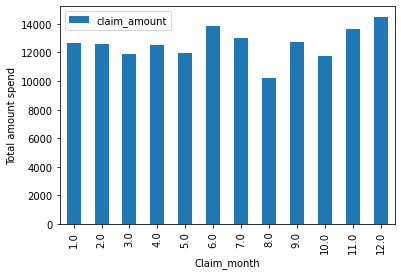

In [38]:
pd.pivot_table(comb_df,index="Claim_month",values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

15. What is the average claim amount for gender and age categories and
suitably represent the above using a facetted bar chart, one facet that
represents fraudulent claims and the other for non-fraudulent claims.
Based on the conclusions from exploratory analysis as well as suitable
statistical tests, answer the below questions. Please include a detailed
write-up on the parameters taken into consideration, the Hypothesis
testing steps, conclusion from the p-values and the business implications of
the statements.


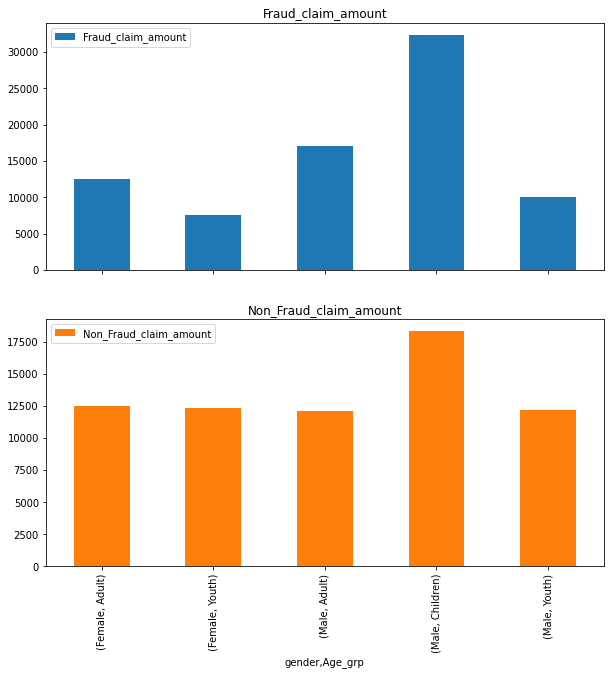

In [41]:
Frauds_amount_gender= pd.DataFrame(comb_df.loc[(comb_df.fraudulent=="Yes")].groupby(["gender","Age_grp"])[["claim_amount"]].mean().add_prefix("Fraud_"))
Non_Frauds_amount_gender=pd.DataFrame(comb_df.loc[(comb_df.fraudulent=="No")].groupby(["gender","Age_grp"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

Claims_age_gender=round(pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender, on=["gender","Age_grp"]),2)

Claims_age_gender

Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()


16. Is there any similarity in the amount claimed by males and females?

In [43]:
claim_male = comb_df['claim_amount'].loc[comb_df['gender']=="Male"]
claim_female = comb_df['claim_amount'].loc[comb_df['gender']=="Female"]

print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))



The average amount claimed by males is 12821.54296875
The average amount claimed by females is 12105.59765625


 
17. Is there any relationship between age category and segment?

In [45]:
import scipy.stats as stats

In [49]:
# To find out this relationship we will use Chi Square test

# H0= No relation between category and segment;
# Ha= There is a relationship between category and segment



agecat_seg = pd.crosstab(comb_df.Age_grp, comb_df.Segment, margins = True)
agecat_seg


Chi_test = stats.chi2_contingency(observed= agecat_seg)
Chi_test


print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))


# Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment

The chi square stat is 6.349304779939779 and the p value is 0.8974603505178772


18. The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was $10,000.


In [47]:
# Here we will check the pearson coeffecient.

# The H0=  No relationship between the 2016-17 claim amounts and current claim amounts,
# Ha= Retionship exists;
# the CI= 95%, p=0.05

comb_df["Year"]= comb_df['claim_month'].dt.year

#current year as per the data given in 2018

Current_year= comb_df.loc[comb_df.Year == 2018]["claim_amount"]
amt_2016_17= comb_df.loc[comb_df.Year==2017]["claim_amount"]

#performing pearson coeffecient

stats.pearsonr(Current_year,amt_2016_17)

#not able to perform it



ValueError: ignored

19. Is there any difference between age groups and insurance claims?


In [48]:
# Here we will perform Ftest ANOVA

# H0 : mean(AgeGroup[Youth]) == mean(AgeGroup[Adult]) (No difference between age groups and insurance claims or No influence of age groups on insurance claims) Ha : mean(AgeGroup[Youth]) != mean(AgeGroup[Adult]) (There is some difference between age groups and insurance claims or there is some influence of age groups on insurance claims)

# In[531]:


age_group_1 = comb_df['total_policy_claims'].loc[comb_df['Age_grp']=="Youth"]
age_group_2 = comb_df['total_policy_claims'].loc[comb_df['Age_grp']=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')


# Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

The f-value is nan and the p value is nan
We fail to reject null hypothesis


20. Is there any relationship between total number of policy claims and the
claimed amount?


In [50]:

comb_df['total_policy_claims'] = pd.to_numeric(comb_df['total_policy_claims'])

#Correlation
comb_df.total_policy_claims.corr(other= comb_df.claim_amount)


# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.

-0.01436903661801273